# 08. Neural networks and deep learning

This week, we'll learn about neural nets and build a model for classifying images of clothes

## 8.1 Fashion classification

Dataset:

- Full: https://github.com/alexeygrigorev/clothing-dataset
- Small: https://github.com/alexeygrigorev/clothing-dataset-small

Links:

- https://cs231n.github.io/

In [1]:
#!git clone git@github.com:alexeygrigorev/clothing-dataset-small.git

## 8.1 TensorFlow and Keras 

- Installing TensorFlow 
- Loading images

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

import tensorflow as tf 
from tensorflow import keras

2022-10-22 23:19:46.472387: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-22 23:19:46.690963: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-10-22 23:19:46.770842: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-22 23:19:47.438087: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

In [2]:
from tensorflow.keras.preprocessing.image import load_img

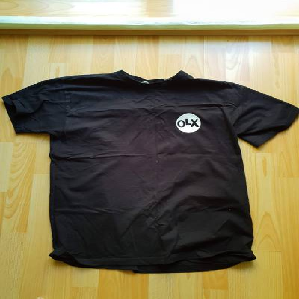

In [3]:
path = './clothing-dataset-small/train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
fullname = f'{path}/{name}'
img = load_img(fullname,target_size=(299,299))
img

In [4]:
type(img)

PIL.Image.Image

In [5]:
x = np.array(img)
x.shape

(299, 299, 3)

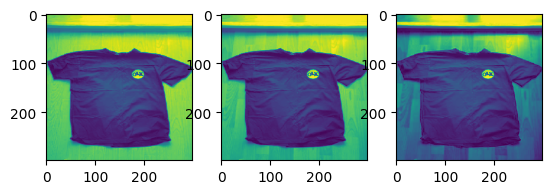

In [6]:
fig,axes = plt.subplots(ncols=3)
colors = ['r','green','b']
for i,ax in enumerate(axes):
    ax.imshow(x[...,i])

## 8.3 Pre-trained convolutional NN 

- Imagenet dataset: https://www.image-net.org/
- Pre-trained models: https://keras.io/api/applications/

In [7]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [8]:
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)

2022-10-22 23:19:49.662702: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-22 23:19:49.717075: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-22 23:19:49.717214: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [9]:
model = Xception(weights="imagenet",input_shape=(299,299,3))

2022-10-22 23:19:50.501469: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-22 23:19:50.502062: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-22 23:19:50.502219: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-22 23:19:50.502296: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so ret

In [10]:
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [11]:
pred = model.predict(X)
pred.shape

2022-10-22 23:19:55.698065: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8204
2022-10-22 23:19:57.024404: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


1/1 [==============================] - 4s 4s/step


2022-10-22 23:19:58.164344: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


(1, 1000)

In [12]:
decode_predictions(pred)

[[('n03775546', 'mixing_bowl', 0.9958171),
  ('n03942813', 'ping-pong_ball', 0.0041828756),
  ('n04116512', 'rubber_eraser', 6.6399066e-22),
  ('n04380533', 'table_lamp', 3.4964612e-23),
  ('n03445777', 'golf_ball', 1.08990916e-23)]]

In [13]:
X = preprocess_input(X)
pred = model.predict(X)
decode_predictions(pred)


1/1 [==============================] - 0s 435ms/step


[[('n03595614', 'jersey', 0.68204755),
  ('n02916936', 'bulletproof_vest', 0.03810644),
  ('n04370456', 'sweatshirt', 0.0342906),
  ('n03710637', 'maillot', 0.011354246),
  ('n04525038', 'velvet', 0.0018452376)]]

## 8.4 Convolutional neural networks

- Types of layers: convolutional and dense
- Convolutional layers and filters
- Dense layers

There are more layers. Read here: https://cs231n.github.io/

- Convolutional Layers: 
    - Consists of filters: smaller images that contain "simple shapes"
    - We applied the filters to the images and see how similar the image is to the filter --> Feature map 
    - One feature map per filter. 
    - Complexity of the filters growths with depth of the network. Low level -- > high level features
    - We convert the feature maps into a vector.

- Dense Layers: 
    - Takes the vector representation to make the final prediction 
    - Use sigmoid for binary classification, and a softmax for multiclass to return prediction probability.
    - Each element of the input is connected to each element of the output

## 8.5 Transfer Learning 

- Reading data from `ImageDataGenerator` 
- Train `Xception` on smaller images (150x150)

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Note: Dense layer is specific to a dataset. So, we do not need the the dense layer. We want to keep the convolutional layers, but want to train new dense layers.

In [15]:
size = (150,150)
batch_size = 32
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [16]:
train_ds = train_gen.flow_from_directory('./clothing-dataset-small/train/',
            target_size=size,batch_size=batch_size)
val_ds = train_gen.flow_from_directory('./clothing-dataset-small/validation/',
            target_size=size,batch_size=batch_size,shuffle=False)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [17]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [18]:
X,y = next(train_ds)

In [19]:
X.shape 

(32, 150, 150, 3)

In [20]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [21]:
y.shape 

(32, 10)

It uses one-hot encoding. 

In [22]:
y[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [23]:
base_model = Xception(
    weights="imagenet",
    include_top=False,
    input_shape=(*size,3)
    )

base_model.trainable = False # We dont want to train convolutional layers 

###  Create a new top

In [24]:
inputs = keras.Input(shape=(*size,3))
base = base_model(inputs)

outputs = base  

model = keras.Model(inputs,outputs)

In [25]:
preds = model.predict(X)

1/1 [==============================] - 0s 479ms/step


In [26]:
preds.shape

(32, 5, 5, 2048)

- We need to convert these preds to a vector representation. So, we can do that by averaging the values of the 5x5 images (pooling operation)

In [27]:
vectors = keras.layers.GlobalAveragePooling2D()(base)
outputs = vectors
model = keras.Model(inputs,outputs)
preds = model.predict(X)
preds.shape

1/1 [==============================] - 0s 383ms/step


(32, 2048)

Note that the shape of the predictions is now a 1D vector for each of the 32 images.

Now, that we have the vectors, we need to convert them into predictions using a dense layer. Returning and array of shape (32,10)

In [28]:
inputs = keras.Input(shape=(*size,3))
base = base_model(inputs)

vectors = keras.layers.GlobalAveragePooling2D()(base) # vector representation
outputs = keras.layers.Dense(10)(vectors) # Turn vect rep into predictions. 10 Classes 
model = keras.Model(inputs,outputs)
preds = model.predict(X)
preds.shape

1/1 [==============================] - 0s 428ms/step


(32, 10)

In [29]:
preds[0]

array([ 1.02901   ,  0.67151797,  0.47094667,  1.6452918 ,  0.34294024,
        0.58367646, -0.40096664, -1.4228332 , -0.9226612 ,  1.0111402 ],
      dtype=float32)

However, the predictions return some weird numbers. This is because the Dense layer is randomly initialized. So we need to train the dense layer.

Note: If we set `keras.losses.CategoricalCrossentropy(from_logits=False)`, we need to specify an activation for the output `keras.layers.Dense`, ie. softmax.

In [30]:
inputs = keras.Input(shape=(*size,3))
base = base_model(inputs,training=False) # Important so we dont update the weights of the base model

vectors = keras.layers.GlobalAveragePooling2D()(base) # vector representation
outputs = keras.layers.Dense(10)(vectors) # Turn vect rep into predictions. 10 Classes 
model = keras.Model(inputs,outputs)

In [31]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

In [32]:
model.compile(optimizer=optimizer,loss=loss,metrics=['accuracy'])

In [33]:
history = model.fit(train_ds,epochs=10,validation_data=val_ds)

Epoch 1/10
96/96 [==============================] - 7s 54ms/step - loss: 1.3215 - accuracy: 0.6626 - val_loss: 0.9730 - val_accuracy: 0.7537
Epoch 2/10
96/96 [==============================] - 4s 40ms/step - loss: 0.5418 - accuracy: 0.8266 - val_loss: 0.9390 - val_accuracy: 0.7801
Epoch 3/10
96/96 [==============================] - 4s 40ms/step - loss: 0.3318 - accuracy: 0.8902 - val_loss: 0.8179 - val_accuracy: 0.7918
Epoch 4/10
96/96 [==============================] - 4s 38ms/step - loss: 0.2492 - accuracy: 0.9094 - val_loss: 0.8256 - val_accuracy: 0.7977
Epoch 5/10
96/96 [==============================] - 4s 44ms/step - loss: 0.1966 - accuracy: 0.9289 - val_loss: 0.9177 - val_accuracy: 0.8094
Epoch 6/10
96/96 [==============================] - 4s 41ms/step - loss: 0.1524 - accuracy: 0.9465 - val_loss: 0.9179 - val_accuracy: 0.8035
Epoch 7/10
96/96 [==============================] - 4s 38ms/step - loss: 0.0823 - accuracy: 0.9720 - val_loss: 1.0219 - val_accuracy: 0.8006
Epoch 8/10
96

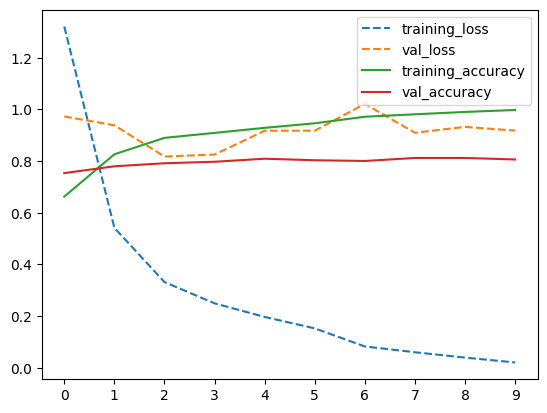

In [34]:
plt.plot(history.history['loss'],ls='--', label='training_loss')
plt.plot(history.history['val_loss'],ls='--', label='val_loss')
plt.plot(history.history['accuracy'], label='training_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xticks(np.arange(10))
plt.legend()

## 8.6 Adjusting the Learning rate

- What's the learning rate
- Trying different lrs 

In [35]:
def make_model(learning_rate=0.01):
    
    base_model = Xception(
    weights="imagenet",
    include_top=False,
    input_shape=(*size,3)
    )

    ###
    base_model.trainable = False # We dont want to train convolutional layers 
    inputs = keras.Input(shape=(*size,3))
    base = base_model(inputs,training=False) # Important so we dont update the weights of the base model
    vectors = keras.layers.GlobalAveragePooling2D()(base) # vector representation
    outputs = keras.layers.Dense(10)(vectors) # Turn vect rep into predictions. 10 Classes 
    model = keras.Model(inputs,outputs)
   
    ###
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    model.compile(optimizer=optimizer,loss=loss,metrics=['accuracy'])
    
    return model

In [36]:
scores = {}
for lr in [0.0001, 0.001, 0.01, 0.1]:
    model = make_model(learning_rate=lr)
    history = model.fit(train_ds,epochs=10,validation_data=val_ds)
    scores[lr] = history.history

Epoch 1/10
96/96 [==============================] - 6s 45ms/step - loss: 1.9744 - accuracy: 0.3413 - val_loss: 1.6320 - val_accuracy: 0.4633
Epoch 2/10
96/96 [==============================] - 4s 39ms/step - loss: 1.4172 - accuracy: 0.5525 - val_loss: 1.2721 - val_accuracy: 0.5894
Epoch 3/10
96/96 [==============================] - 4s 38ms/step - loss: 1.1614 - accuracy: 0.6314 - val_loss: 1.0862 - val_accuracy: 0.6481
Epoch 4/10
96/96 [==============================] - 4s 43ms/step - loss: 1.0158 - accuracy: 0.6754 - val_loss: 0.9662 - val_accuracy: 0.6921
Epoch 5/10
96/96 [==============================] - 4s 39ms/step - loss: 0.9188 - accuracy: 0.7080 - val_loss: 0.8909 - val_accuracy: 0.7185
Epoch 6/10
96/96 [==============================] - 4s 40ms/step - loss: 0.8483 - accuracy: 0.7256 - val_loss: 0.8378 - val_accuracy: 0.7449
Epoch 7/10
96/96 [==============================] - 4s 40ms/step - loss: 0.7957 - accuracy: 0.7438 - val_loss: 0.7906 - val_accuracy: 0.7595
Epoch 8/10
96

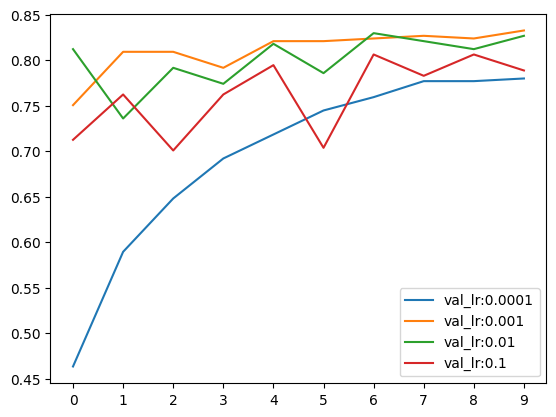

In [37]:
for lr,hist in scores.items():
    #plt.plot(hist['accuracy'],ls='--', label=f'train_lr:{lr}')
    plt.plot(hist['val_accuracy'], label=f'val_lr:{lr}')
    plt.xticks(np.arange(10))
    plt.legend()

In [38]:
del scores[0.1]
del scores[0.0001]

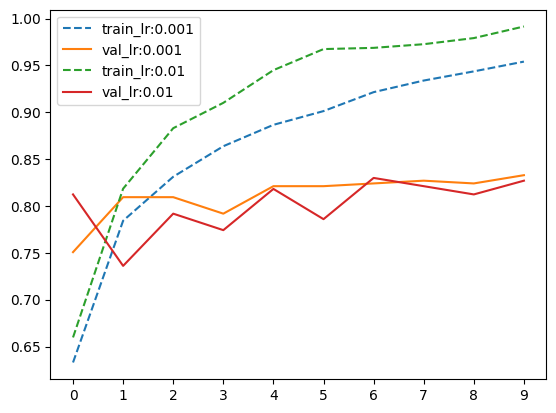

In [39]:
for lr,hist in scores.items():
    plt.plot(hist['accuracy'],ls='--', label=f'train_lr:{lr}')
    plt.plot(hist['val_accuracy'], label=f'val_lr:{lr}')
    plt.xticks(np.arange(10))
    plt.legend()

## 8.7 Checkpointing 

- Saving the best model only 
- Training a model with callbacks

In [40]:
from keras.callbacks import ModelCheckpoint 

mname = 'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5'
checkpoint = ModelCheckpoint(mname,
                save_best_only=True,
                monitor='val_accuracy',
                mode='max')

In [117]:
learning_rate = 0.001
model = make_model(learning_rate=learning_rate)
history = model.fit(train_ds,
        epochs=10,
        validation_data=val_ds,
        callbacks = [checkpoint])

Epoch 1/10
96/96 [==============================] - 6s 51ms/step - loss: 1.0769 - accuracy: 0.6385 - val_loss: 0.7038 - val_accuracy: 0.8006
Epoch 2/10
96/96 [==============================] - 5s 47ms/step - loss: 0.6258 - accuracy: 0.7930 - val_loss: 0.6124 - val_accuracy: 0.8211
Epoch 3/10
96/96 [==============================] - 4s 42ms/step - loss: 0.5131 - accuracy: 0.8250 - val_loss: 0.5765 - val_accuracy: 0.8094
Epoch 4/10
96/96 [==============================] - 4s 42ms/step - loss: 0.4343 - accuracy: 0.8634 - val_loss: 0.6008 - val_accuracy: 0.8211
Epoch 5/10
96/96 [==============================] - 4s 43ms/step - loss: 0.3730 - accuracy: 0.8862 - val_loss: 0.5599 - val_accuracy: 0.8152
Epoch 6/10
96/96 [==============================] - 4s 43ms/step - loss: 0.3295 - accuracy: 0.9035 - val_loss: 0.5409 - val_accuracy: 0.8182
Epoch 7/10
96/96 [==============================] - 4s 43ms/step - loss: 0.2883 - accuracy: 0.9205 - val_loss: 0.5360 - val_accuracy: 0.8211
Epoch 8/10
96

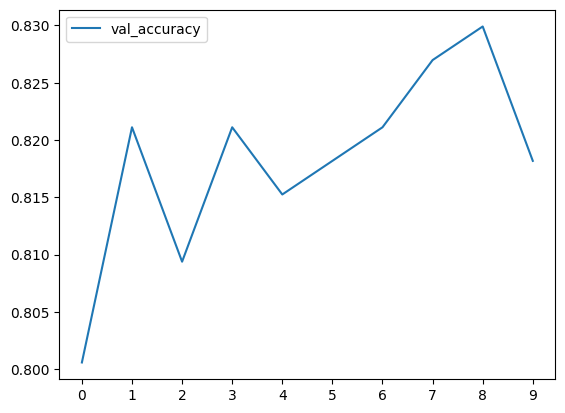

In [119]:
#plt.plot(history.history['loss'],ls='--', label='training_loss')
#plt.plot(history.history['val_loss'],ls='--', label='val_loss')
#plt.plot(history.history['accuracy'], label='training_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xticks(np.arange(10))
plt.legend()

## 8.8 Adding more layers 

- Adding one inner dense layer 
- Experimenting with different sizes of inner layer

- Activation functions:
    - Output Layers: Sigmoid, softmax 
    - Intermediate layers: ReLu

In [41]:
def make_model(learning_rate=0.01,size_inner=100):
    
    base_model = Xception(
    weights="imagenet",
    include_top=False,
    input_shape=(*size,3)
    )

    ###
    base_model.trainable = False # We dont want to train convolutional layers 
    inputs = keras.Input(shape=(*size,3))
    base = base_model(inputs,training=False) # Important so we dont update the weights of the base model
    vectors = keras.layers.GlobalAveragePooling2D()(base) # vector representation

    inner = keras.layers.Dense(size_inner,activation='relu')(vectors) # size 32x100

    outputs = keras.layers.Dense(10)(inner) # Turn vect rep into predictions. 10 Classes 
    model = keras.Model(inputs,outputs)
   
    ###
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    model.compile(optimizer=optimizer,loss=loss,metrics=['accuracy'])
    
    return model

In [42]:
learning_rate = 0.001
scores = {}
for si in [10,100,1000]:
    model = make_model(learning_rate=learning_rate,size_inner=si)
    history = model.fit(train_ds,epochs=10,validation_data=val_ds)
    scores[si] = history.history

Epoch 1/10
96/96 [==============================] - 6s 45ms/step - loss: 1.3720 - accuracy: 0.5394 - val_loss: 1.0670 - val_accuracy: 0.6716
Epoch 2/10
96/96 [==============================] - 4s 40ms/step - loss: 0.8945 - accuracy: 0.6930 - val_loss: 0.8281 - val_accuracy: 0.7302
Epoch 3/10
96/96 [==============================] - 4s 39ms/step - loss: 0.6524 - accuracy: 0.7832 - val_loss: 0.6330 - val_accuracy: 0.8152
Epoch 4/10
96/96 [==============================] - 4s 38ms/step - loss: 0.4981 - accuracy: 0.8360 - val_loss: 0.5961 - val_accuracy: 0.7918
Epoch 5/10
96/96 [==============================] - 4s 39ms/step - loss: 0.4111 - accuracy: 0.8654 - val_loss: 0.5672 - val_accuracy: 0.8328
Epoch 6/10
96/96 [==============================] - 4s 38ms/step - loss: 0.3417 - accuracy: 0.9029 - val_loss: 0.5651 - val_accuracy: 0.8152
Epoch 7/10
96/96 [==============================] - 4s 37ms/step - loss: 0.3001 - accuracy: 0.9195 - val_loss: 0.5775 - val_accuracy: 0.8035
Epoch 8/10
96

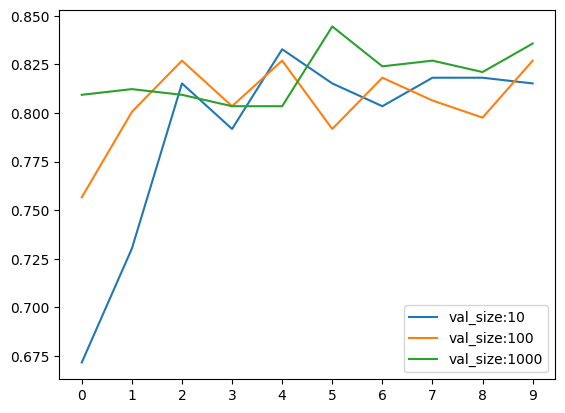

In [43]:
for si,hist in scores.items():
    #plt.plot(hist['accuracy'],ls='--', label=f'train_size:{si}')
    plt.plot(hist['val_accuracy'], label=f'val_size:{si}')
    plt.xticks(np.arange(10))
    plt.legend()

## 8.9 Regularization and Dropout

- Regularizing by freezing a part of the ntework 
- Add dropout to our model 

### Dropout

We turn off some of the connections (freeze) in the inner layer. In every epoch, we freeze a different set of connections, so they are not updated in that epoch. 

In [44]:
def make_model(learning_rate=0.01,size_inner=100,drop_rate=0.5):
    
    base_model = Xception(
    weights="imagenet",
    include_top=False,
    input_shape=(*size,3)
    )

    ###
    base_model.trainable = False # We dont want to train convolutional layers 
    inputs = keras.Input(shape=(*size,3))
    base = base_model(inputs,training=False) # Important so we dont update the weights of the base model
    vectors = keras.layers.GlobalAveragePooling2D()(base) # vector representation

    inner = keras.layers.Dense(size_inner,activation='relu')(vectors) # size 32x100
    
    dropout = keras.layers.Dropout(drop_rate)(inner)

    outputs = keras.layers.Dense(10)(dropout) # Turn vect rep into predictions. 10 Classes 
    model = keras.Model(inputs,outputs)
   
    ###
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    model.compile(optimizer=optimizer,loss=loss,metrics=['accuracy'])
    
    return model

In [45]:
learning_rate = 0.001
size_inner = 100
scores = {}
for dp in [0.0,0.2,0.5,0.8]:
    model = make_model(learning_rate=learning_rate,size_inner=size_inner, drop_rate=dp)
    history = model.fit(train_ds,epochs=30,validation_data=val_ds)
    scores[dp] = history.history

Epoch 1/30
96/96 [==============================] - 6s 45ms/step - loss: 0.9540 - accuracy: 0.6653 - val_loss: 0.6339 - val_accuracy: 0.7947
Epoch 2/30
96/96 [==============================] - 4s 40ms/step - loss: 0.4940 - accuracy: 0.8308 - val_loss: 0.5645 - val_accuracy: 0.8065
Epoch 3/30
96/96 [==============================] - 4s 37ms/step - loss: 0.3589 - accuracy: 0.8768 - val_loss: 0.6429 - val_accuracy: 0.7830
Epoch 4/30
96/96 [==============================] - 4s 39ms/step - loss: 0.2456 - accuracy: 0.9214 - val_loss: 0.5402 - val_accuracy: 0.8328
Epoch 5/30
96/96 [==============================] - 4s 41ms/step - loss: 0.1682 - accuracy: 0.9534 - val_loss: 0.5810 - val_accuracy: 0.8416
Epoch 6/30
96/96 [==============================] - 4s 42ms/step - loss: 0.1264 - accuracy: 0.9671 - val_loss: 0.6183 - val_accuracy: 0.8152
Epoch 7/30
96/96 [==============================] - 4s 41ms/step - loss: 0.0785 - accuracy: 0.9889 - val_loss: 0.5819 - val_accuracy: 0.8094
Epoch 8/30
96

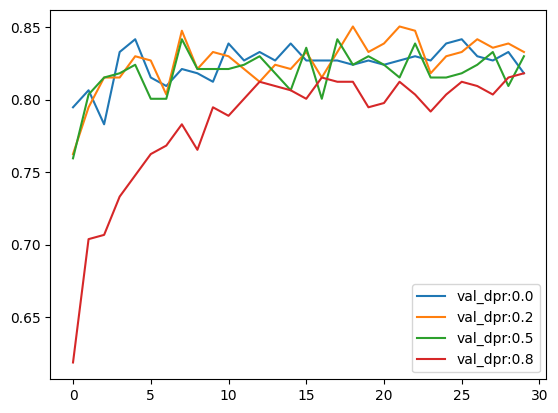

In [46]:
for dp,hist in scores.items():
    #plt.plot(hist['accuracy'],ls='--', label=f'train_dpr:{dp}')
    plt.plot(hist['val_accuracy'], label=f'val_dpr:{dp}')
#plt.ylim(0.8,0.85)
plt.legend()

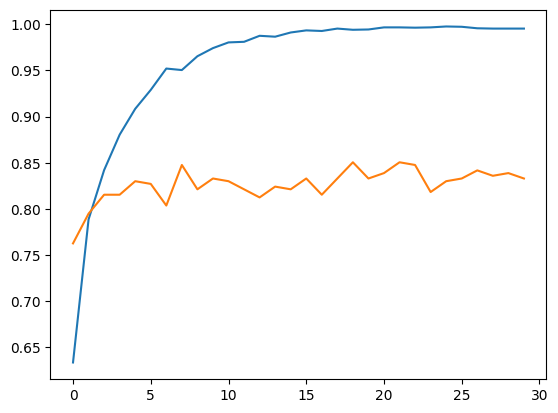

In [47]:
dpr = 0.2
hist = scores[dpr]
plt.plot(hist['accuracy'],label=f'train_dpr:{dpr}')
plt.plot(hist['val_accuracy'],label=f'val_dpr:{dpr}')

## 8.10  Data augmentation

- Image transformations:
    - Flip: Horizontal or vertical 
    - Rotation 
    - Shift: Move the image up or down (heigth_shift), left or right (width_shift). 
    - Shear 
    - Zoom: In `x` or `y` direction.
    - Brightness/Contrast 
    - Black Patch

How to choose the augmentations?
- Judgement 
- Look at the dataset. What kind of variations are in it?
- Are the objects always centered? 
    - Rotate, shift 
- Augmentation is a `hyperparameter`. So, we need to experiment with them. 

In [48]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    vertical_flip=True
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [51]:
learning_rate = 0.001
inner_size = 100 
droprate = 0.2
model = make_model(
    learning_rate=learning_rate,
    size_inner= inner_size,
    drop_rate=droprate
)

history = model.fit(train_ds,epochs=50,validation_data=val_ds)

Epoch 1/50
96/96 [==============================] - 13s 121ms/step - loss: 1.3204 - accuracy: 0.5688 - val_loss: 0.7471 - val_accuracy: 0.7683
Epoch 2/50
96/96 [==============================] - 11s 111ms/step - loss: 0.9160 - accuracy: 0.6920 - val_loss: 0.6987 - val_accuracy: 0.7566
Epoch 3/50
96/96 [==============================] - 10s 109ms/step - loss: 0.7819 - accuracy: 0.7295 - val_loss: 0.6413 - val_accuracy: 0.7947
Epoch 4/50
96/96 [==============================] - 11s 111ms/step - loss: 0.7180 - accuracy: 0.7595 - val_loss: 0.6262 - val_accuracy: 0.7683
Epoch 5/50
96/96 [==============================] - 11s 112ms/step - loss: 0.6525 - accuracy: 0.7875 - val_loss: 0.6368 - val_accuracy: 0.7830
Epoch 6/50
96/96 [==============================] - 10s 108ms/step - loss: 0.5937 - accuracy: 0.7992 - val_loss: 0.6271 - val_accuracy: 0.7859
Epoch 7/50
96/96 [==============================] - 10s 105ms/step - loss: 0.5822 - accuracy: 0.8028 - val_loss: 0.6181 - val_accuracy: 0.7889

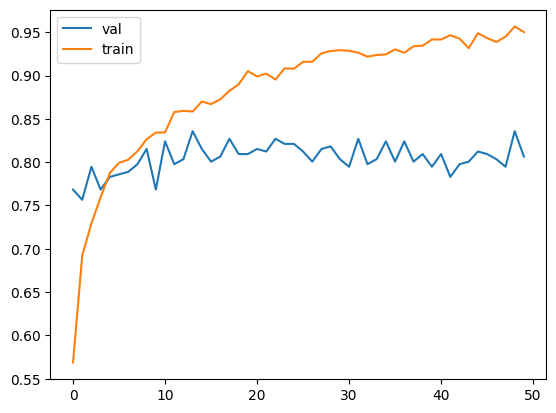

In [52]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

## 8.11 Training a larger model 

In [53]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100,
               drop_rate=0.5):

    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(drop_rate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [54]:
input_size = 299

In [59]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(input_size, input_size),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [60]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [61]:
learning_rate = 0.0005
inner_size = 100
droprate = 0.2

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=inner_size,
    drop_rate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds,
                   callbacks=[checkpoint])

Epoch 1/50
96/96 [==============================] - 38s 381ms/step - loss: 1.0240 - accuracy: 0.6825 - val_loss: 0.5411 - val_accuracy: 0.8240
Epoch 2/50
96/96 [==============================] - 36s 374ms/step - loss: 0.5332 - accuracy: 0.8204 - val_loss: 0.4386 - val_accuracy: 0.8651
Epoch 3/50
96/96 [==============================] - 33s 337ms/step - loss: 0.4395 - accuracy: 0.8491 - val_loss: 0.4133 - val_accuracy: 0.8622
Epoch 4/50
96/96 [==============================] - 32s 337ms/step - loss: 0.3895 - accuracy: 0.8706 - val_loss: 0.3994 - val_accuracy: 0.8563
Epoch 5/50
96/96 [==============================] - 34s 350ms/step - loss: 0.3523 - accuracy: 0.8869 - val_loss: 0.3732 - val_accuracy: 0.8680
Epoch 6/50
96/96 [==============================] - 33s 347ms/step - loss: 0.3092 - accuracy: 0.8934 - val_loss: 0.3693 - val_accuracy: 0.8710
Epoch 7/50
96/96 [==============================] - 32s 333ms/step - loss: 0.2959 - accuracy: 0.8931 - val_loss: 0.3582 - val_accuracy: 0.8886

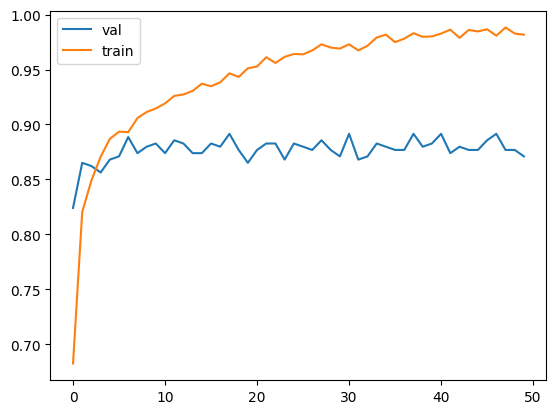

In [62]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

## 8.12 Using the model 

In [1]:
import numpy as np 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.xception import preprocess_input

2022-10-23 00:29:03.437452: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-23 00:29:03.632175: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-10-23 00:29:03.706388: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-23 00:29:04.320555: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

In [2]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    './clothing-dataset-small/test',
    target_size=(299, 299),
    batch_size=32,
    shuffle=False
)

Found 372 images belonging to 10 classes.


In [3]:
model = keras.models.load_model('xception_v4_1_18_0.891.h5')

2022-10-23 00:29:12.314154: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-23 00:29:12.362114: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-23 00:29:12.362251: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-23 00:29:12.362758: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

In [4]:
model.evaluate(test_ds)

2022-10-23 00:29:20.065122: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8204
2022-10-23 00:29:20.887222: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


 2/12 [====>.........................] - ETA: 0s - loss: 0.4968 - accuracy: 0.7812 

2022-10-23 00:29:21.798339: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


12/12 [==============================] - 4s 80ms/step - loss: 0.2655 - accuracy: 0.9005


[0.26549091935157776, 0.9005376100540161]

In [5]:
path = 'clothing-dataset-small/test/pants/c8d21106-bbdb-4e8d-83e4-bf3d14e54c16.jpg'

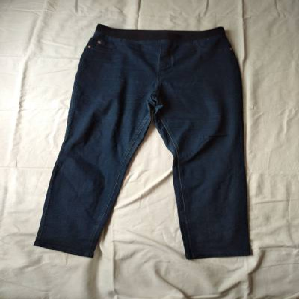

In [7]:
img = load_img(path, target_size=(299, 299))
img

In [8]:
x = np.array(img)
X = np.array([x])
X = preprocess_input(X)
pred = model.predict(X)

1/1 [==============================] - 0s 452ms/step


In [9]:
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]

In [11]:
results = dict(zip(classes,pred[0]))

In [20]:
results = dict(sorted(results.items(),key= lambda x:x[1],reverse=True))

In [21]:
results

{'pants': 10.805859,
 'shorts': 3.5633318,
 'shirt': -1.837858,
 't-shirt': -2.7275484,
 'longsleeve': -3.3780317,
 'skirt': -3.7329004,
 'shoes': -3.7708654,
 'outwear': -3.9345555,
 'dress': -4.2611938,
 'hat': -4.905928}